In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_float
from skimage import io, color, morphology

from math import ceil, floor, pow, log

%matplotlib notebook

In [12]:
img_path = 'image.jpg'

In [13]:
img_raw = cv2.imread(img_path)
img = cv2.resize(src=img_raw,dsize=(400,240))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

print('shape', img_gray.shape)
print('dtype', img_gray.dtype)

shape (240, 400)
dtype uint8


<IPython.core.display.Javascript object>


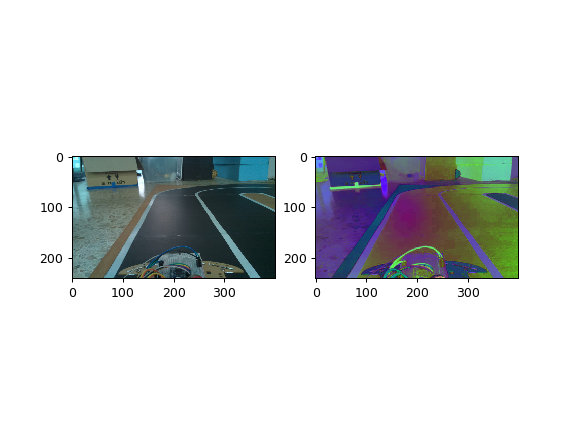

In [14]:
plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.subplot(1,2,2)
plt.imshow(img_hsv)

<IPython.core.display.Javascript object>


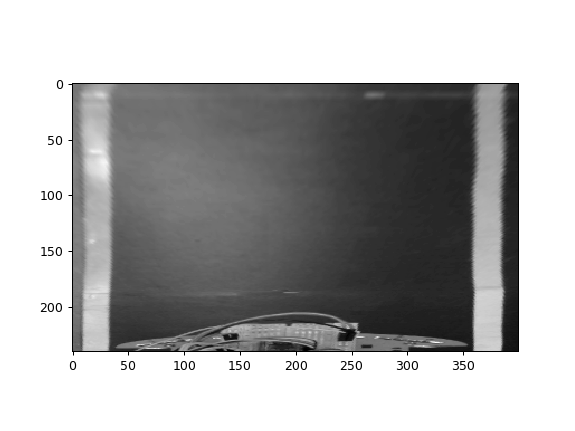

In [15]:
pts1 = np.float32([[160, 75], [250, 75], [55, 240], [385, 240]])
pts2 = np.float32([[0, 0], [img_hsv.shape[1] , 0], [0, img_hsv.shape[0]], [img_hsv.shape[1], img_hsv.shape[0]]])

matrix = cv2.getPerspectiveTransform(pts1, pts2)
img_output = cv2.warpPerspective(img_hsv, matrix, (img_hsv.shape[1], img_hsv.shape[0]))

img_output_intensity = img_output[:,:,2]

plt.figure(2)
plt.imshow(img_output_intensity,'gray')

In [16]:
intensity1 = 120
intensity2 = 100

img_thres = np.zeros((img_output.shape[0],img_output.shape[1]))

for x in range(0,img_thres.shape[0]):
    for y in range(0,img_thres.shape[1]//2):
        img_thres[x][y] = img_output[x][y][2] > intensity1
        
for x in range(0,img_thres.shape[0]):
    for y in range(img_thres.shape[1]//2,img_thres.shape[1]):
        img_thres[x][y] = img_output[x][y][2] > intensity2

<IPython.core.display.Javascript object>


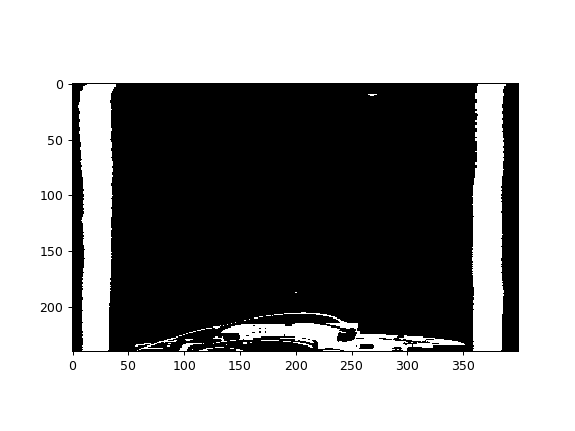

In [17]:
plt.figure(3)
plt.imshow(img_thres,'gray')

<IPython.core.display.Javascript object>


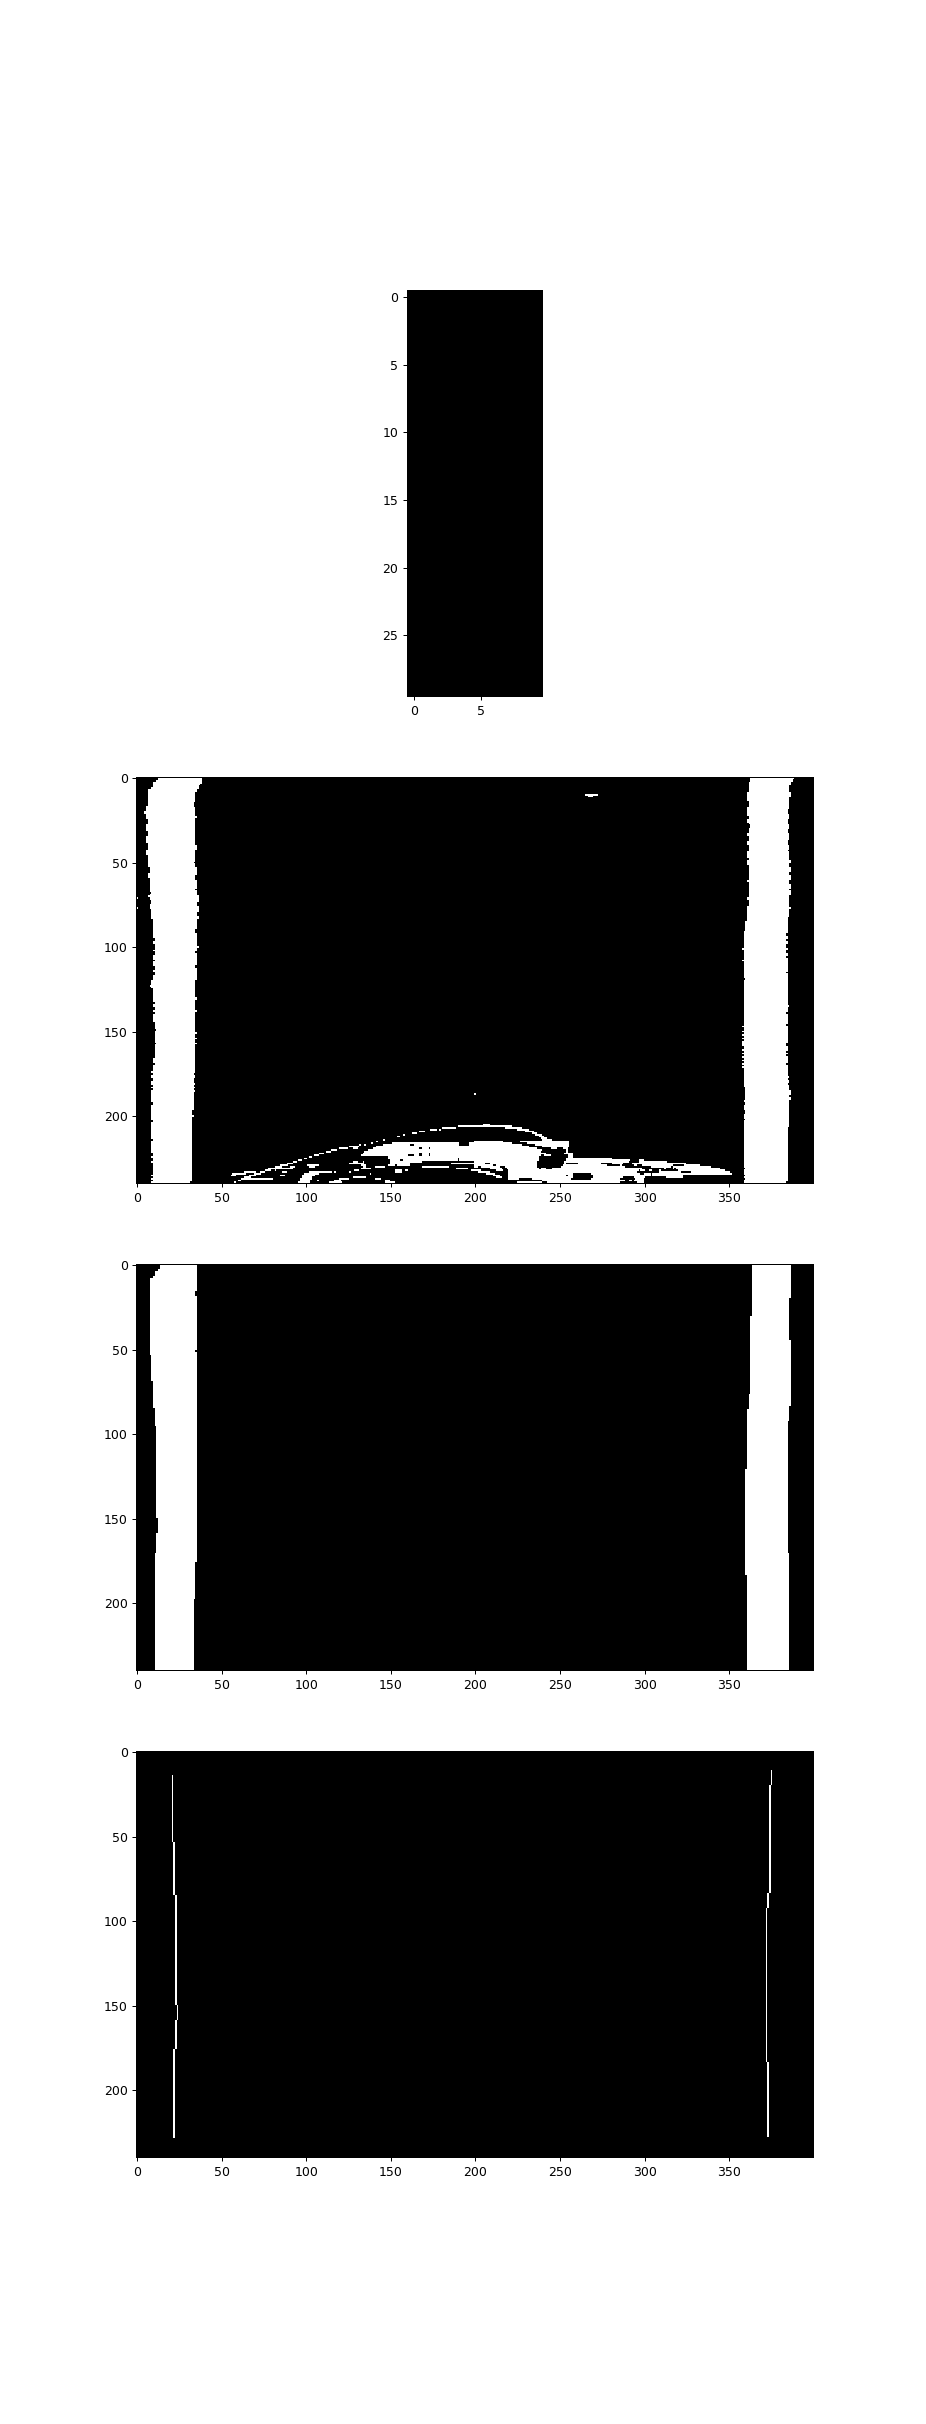

In [18]:
kernel = np.ones((30,10),np.uint8)

img_opened = cv2.morphologyEx(img_thres, cv2.MORPH_OPEN, kernel)

img_thinned = morphology.thin(img_opened)

plt.figure(4)
plt.subplot(4,1,1)
plt.imshow(kernel,'gray')
plt.subplot(4,1,2)
plt.imshow(img_thres,'gray')
plt.subplot(4,1,3)
plt.imshow(img_opened,'gray')
plt.subplot(4,1,4)
plt.imshow(img_thinned,'gray')